<a href="https://colab.research.google.com/github/farukemrekaraca/ztm-tensorflow-machinelearning-deeplearning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


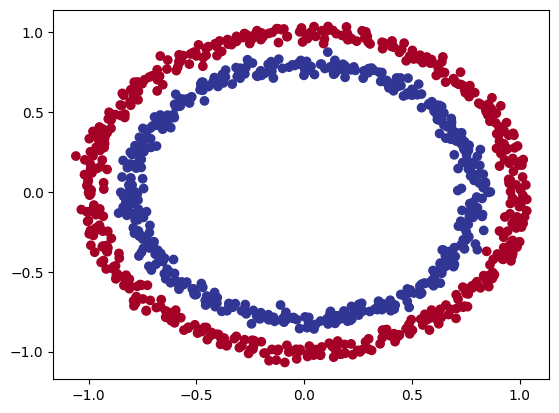

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 6ms/step - loss: 5.3307 - accuracy: 0.5390
Epoch 2/5
32/32 [==============================] - 0s 7ms/step - loss: 5.1337 - accuracy: 0.5420
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 5.1601 - accuracy: 0.5370
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 5.1413 - accuracy: 0.5360
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 5.1103 - accuracy: 0.5400


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 1s 8ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.9921 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.4960
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.4920
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6965 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6959 - accuracy: 0.5030
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4950
Epoch 11/

In [ ]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932433843612671, 0.5]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(2)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.5110


[0.7018845081329346, 0.5109999775886536]

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
binary classification


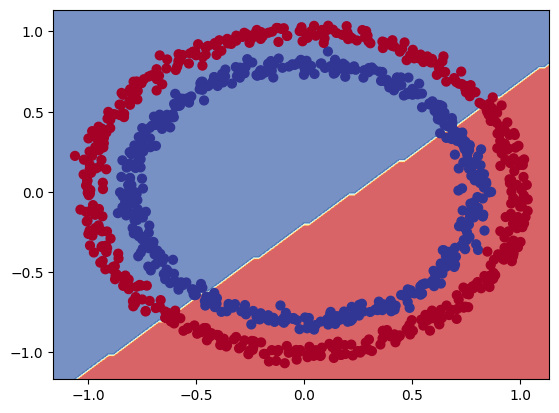

In [ ]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_4 = tf.keras.Sequential([
  ## Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  ## After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics="mae")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data

## Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100) # <- this will error in TensorFlow 2.7.0+

## After TensorFlow 2.7.0
model_5.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100,
            verbose=0)

2/2 [==============================] - 0s 5ms/step


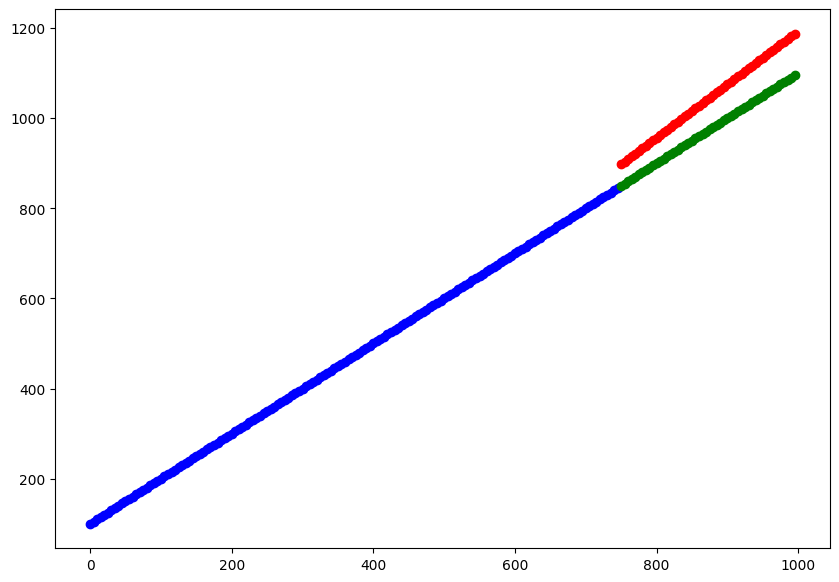

In [ ]:
y_reg_preds = model_5.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="tanh"),
    tf.keras.layers.Dense(2, activation="tanh")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.03),
                metrics=["accuracy"])

model_6.fit(X, y, epochs=100, verbose=0)

313/313 [==============================] - 0s 1ms/step
multiclass classification


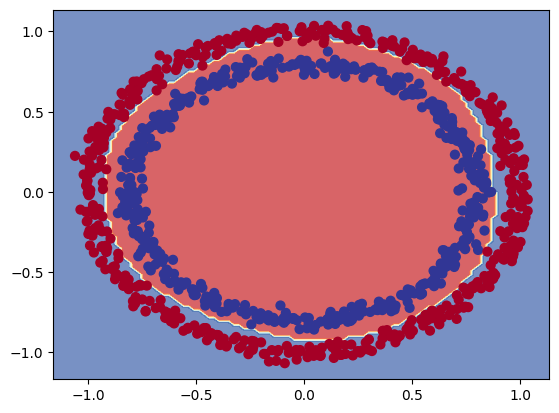

In [ ]:
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7002 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5090
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5220
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5490
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5770
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6130
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6250
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.6070
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6280
Epoch 11/

313/313 [==============================] - 0s 1ms/step
binary classification


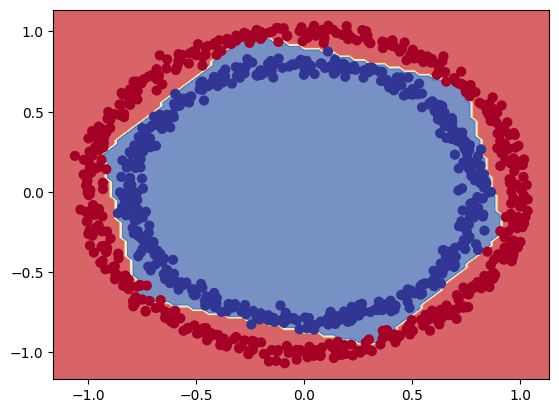

In [ ]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

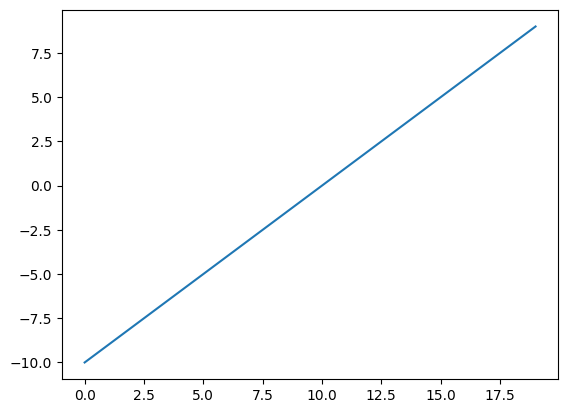

In [ ]:
plt.plot(A);

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

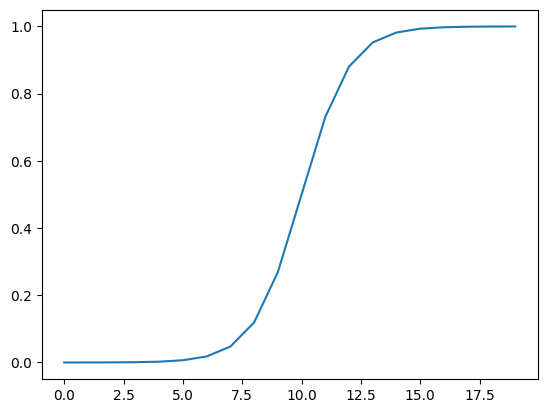

In [ ]:
plt.plot(sigmoid(A));

In [ ]:
def relu(x):
  return tf.maximum(0, x)

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

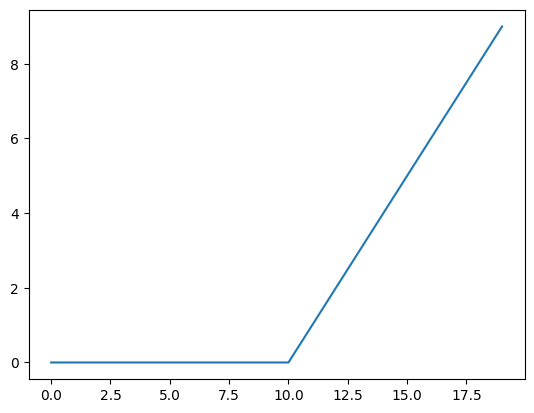

In [ ]:
plt.plot(relu(A))

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history_8 = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 3s 3ms/step - loss: 0.6874 - accuracy: 0.5213
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5800
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5838
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.5900
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.6425
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.6687
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5867 - accuracy: 0.7663
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.8112
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.8612
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.9388
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0616 - accuracy: 0.9950


[0.06160934269428253, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
binary classification


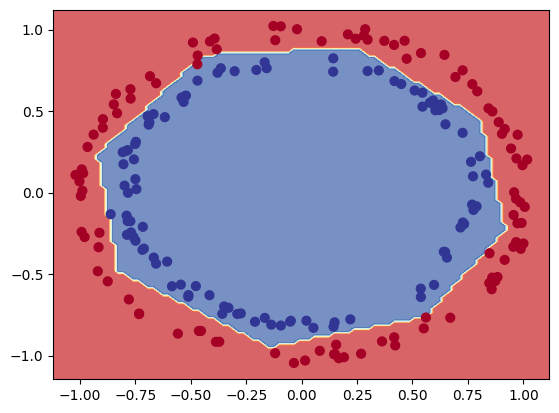

In [ ]:
plot_decision_boundary(model=model_8, X=X_test, y=y_test)

313/313 [==============================] - 1s 4ms/step
binary classification
313/313 [==============================] - 0s 1ms/step
binary classification


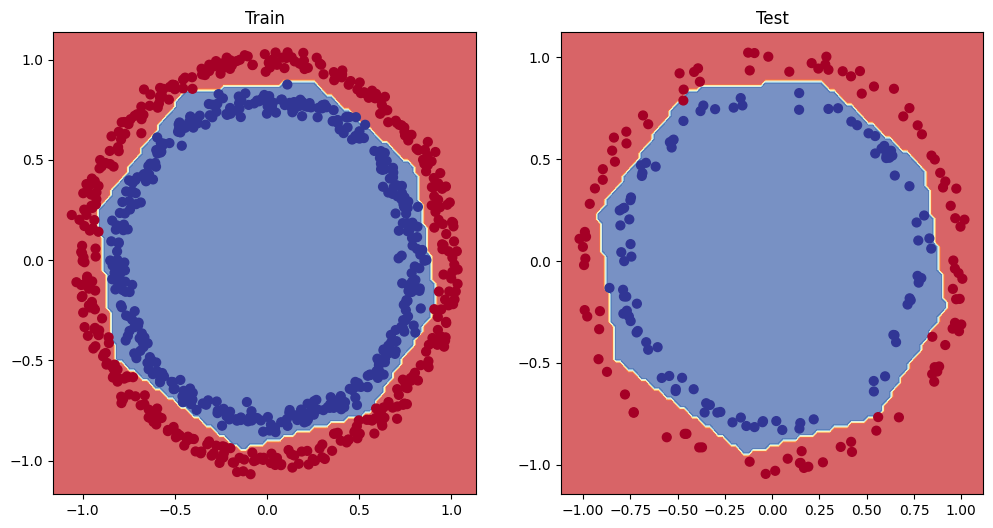

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

In [ ]:
history_8.history

{'loss': [0.6873670816421509,
  0.6815247535705566,
  0.673176109790802,
  0.6632475852966309,
  0.6454555988311768,
  0.6209184527397156,
  0.5866780877113342,
  0.5453572869300842,
  0.4851459562778473,
  0.40453770756721497,
  0.3393612802028656,
  0.2833682596683502,
  0.23725882172584534,
  0.20090006291866302,
  0.1729644536972046,
  0.15119779109954834,
  0.13300560414791107,
  0.12064302712678909,
  0.10983109474182129,
  0.10561522841453552,
  0.09133267402648926,
  0.08491117507219315,
  0.07814144343137741,
  0.07528854161500931,
  0.06795747578144073],
 'accuracy': [0.5212500095367432,
  0.5799999833106995,
  0.5837500095367432,
  0.5899999737739563,
  0.6424999833106995,
  0.668749988079071,
  0.7662500143051147,
  0.8112499713897705,
  0.8612499833106995,
  0.9387500286102295,
  0.9637500047683716,
  0.981249988079071,
  0.987500011920929,
  0.9937499761581421,
  0.9950000047683716,
  1.0,
  0.9950000047683716,
  0.9962499737739563,
  0.9962499737739563,
  0.9925000071525

In [ ]:
pd.DataFrame(history_8.history)

,loss,accuracy
0,0.687367,0.52125
1,0.681525,0.58000
2,0.673176,0.58375
3,0.663248,0.59000
4,0.645456,0.64250
5,0.620918,0.66875
6,0.586678,0.76625
7,0.545357,0.81125
8,0.485146,0.86125
9,0.404538,0.93875


Text(0.5, 1.0, 'Model_8 loss curves')

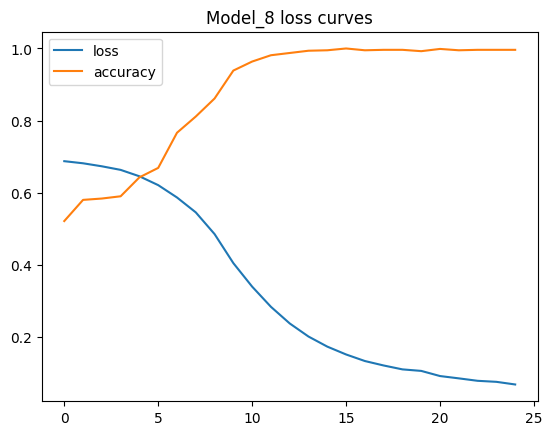

In [ ]:
pd.DataFrame(history_8.history).plot()
plt.title("Model_8 loss curves")

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5100 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

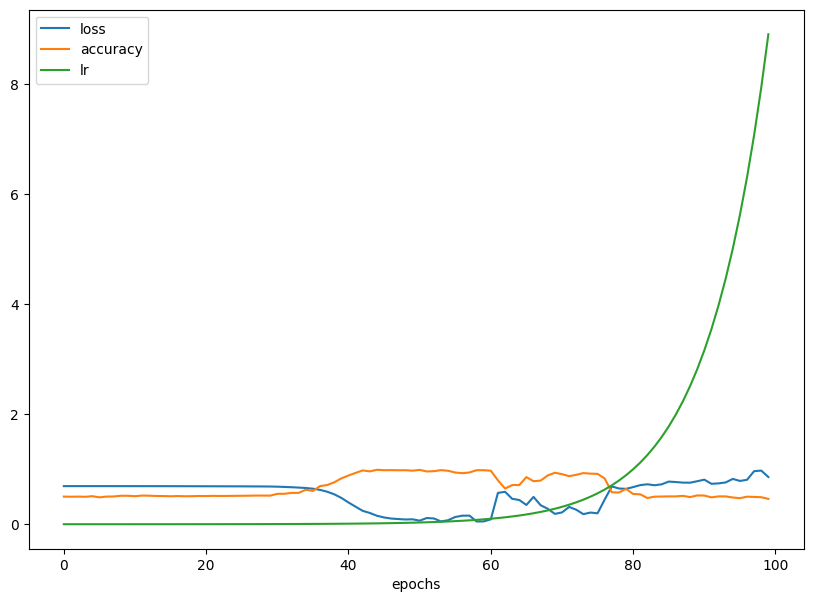

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

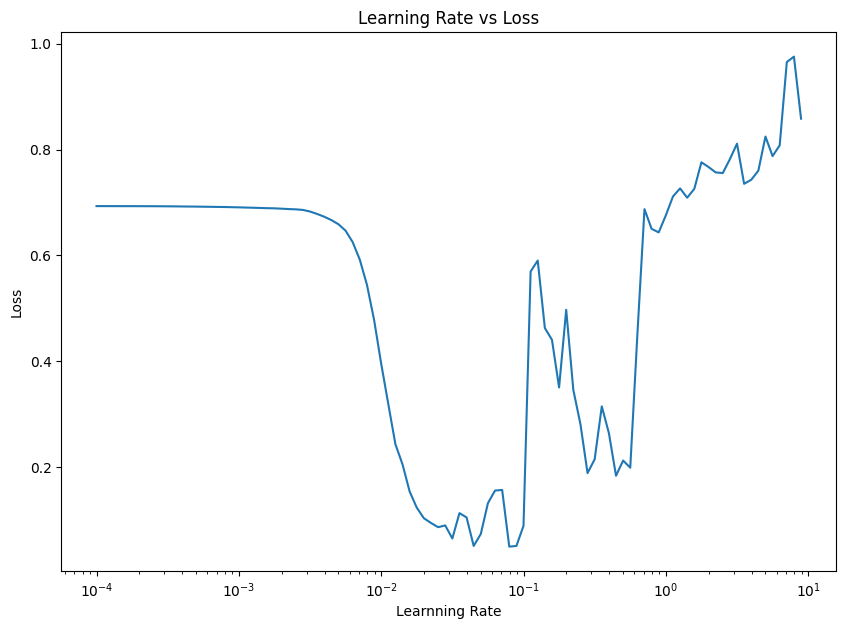

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learnning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0158),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train, y_train, epochs=60)

Epoch 1/60
25/25 [==============================] - 2s 5ms/step - loss: 0.6913 - accuracy: 0.5088
Epoch 2/60
25/25 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5163
Epoch 3/60
25/25 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.5850
Epoch 4/60
25/25 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.5675
Epoch 5/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6050
Epoch 6/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6354 - accuracy: 0.6612
Epoch 7/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.7138
Epoch 8/60
25/25 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.7262
Epoch 9/60
25/25 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7625
Epoch 10/60
25/25 [==============================] - 0s 2ms/step - loss: 0.5298 - accuracy: 0.7713
Epoch 11/60
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.9750


[0.0881204679608345, 0.9750000238418579]

Text(0.5, 1.0, 'Model_10 loss curves')

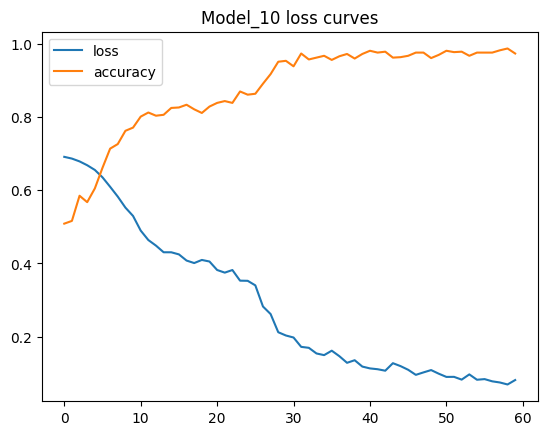

In [ ]:
pd.DataFrame(history_10.history).plot()
plt.title("Model_10 loss curves")

In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_11.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history_11 = model_11.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 4ms/step - loss: 0.6856 - accuracy: 0.5612
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.5625
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.5650
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.6062
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.6862
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7738
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.8687
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2947 - accuracy: 0.9475
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 0.9787
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1354 - accuracy: 0.9875
Epoch 11/20
25/25 [

Text(0.5, 1.0, 'Model_11 loss curves')

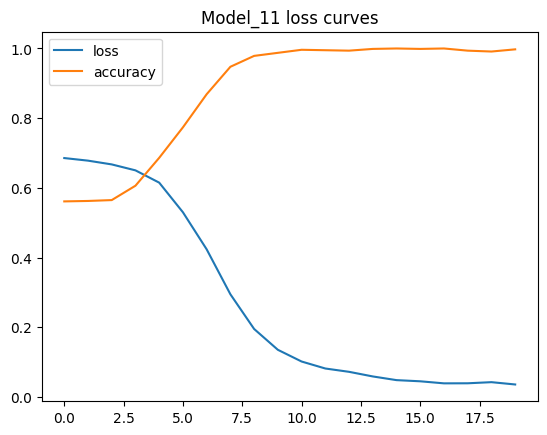

In [ ]:
pd.DataFrame(history_11.history).plot()
plt.title("Model_11 loss curves")

In [ ]:
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 1s 12ms/step - loss: 0.0432 - accuracy: 0.9950


[0.04323478788137436, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
binary classification
313/313 [==============================] - 1s 2ms/step
binary classification


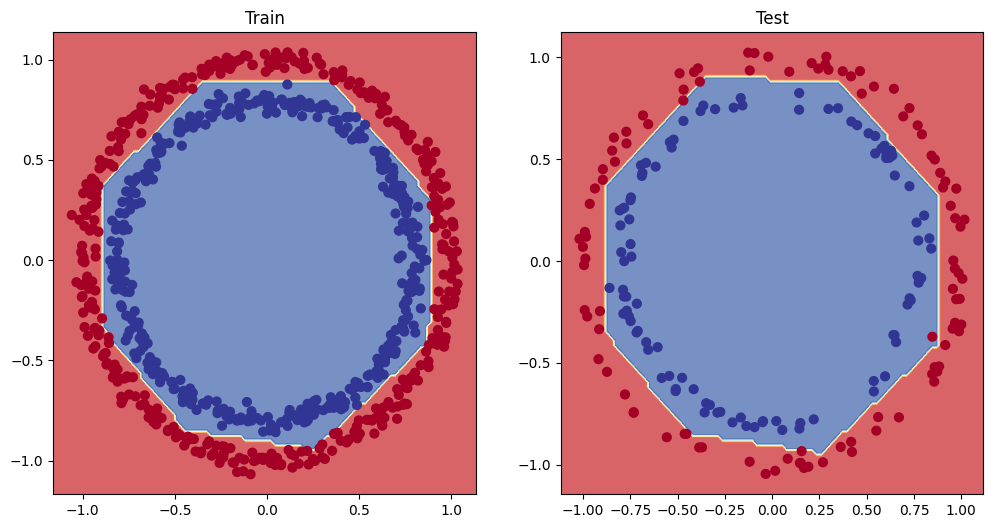

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_11, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_11, X=X_test, y=y_test)
plt.show();

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_preds_11 = model_11.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds_11))

7/7 [==============================] - 0s 3ms/step


array([[100,   1],
       [  0,  99]])

In [ ]:
import itertools

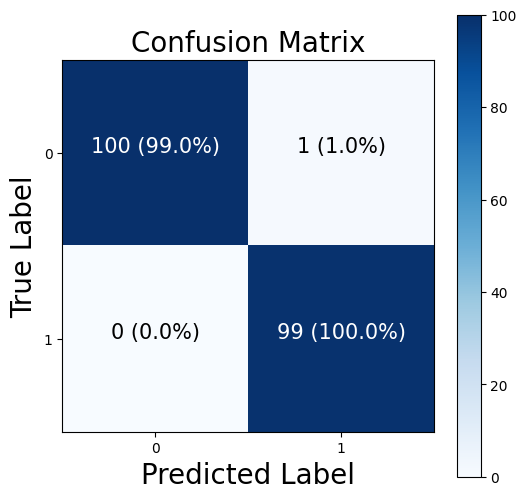

In [ ]:
figsize = (6, 6)

cm = confusion_matrix(y_test, tf.round(y_preds_11))

cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes :
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = ((cm.max() + cm.min()) / 2)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment ="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)